In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
# load the image
img = cv2.imread('/content/drive/MyDrive/US.jpg')
np_img = np.array(img)
print(np_img)

[[[ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]
  ...
  [ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]]

 [[ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]
  ...
  [ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]]

 [[ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]
  ...
  [ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]]

 ...

 [[ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 16  16  16]
  [ 16  16  16]
  [ 16  16  16]]

 [[ 22  22  22]
  [ 22  22  22]
  [ 22  22  22]
  ...
  [ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]]


In [ ]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
def lee_filter(np_img, size=(3,3)):
    img_mean = uniform_filter(np_img, size) # mean of the image 
    img_sqr_mean = uniform_filter(img**2, size) #square of the mean image
    img_variance = img_sqr_mean - img_mean**2 # kernel variance 

    overall_variance = variance(np_img) # overall variance of the image 

    img_weights = img_variance / (img_variance + overall_variance) #image weight function
    img_output = img_mean + img_weights * (np_img - img_mean) #despeckled image 
    return img_output




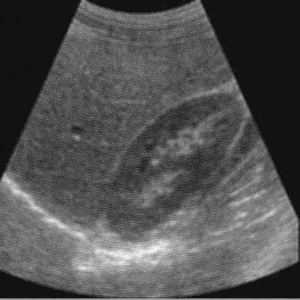

In [ ]:
cv2_imshow(lee_filter(img,size=(3,3)))
plt.show()


In [ ]:
pip install findpeaks

[findpeaks] >Resizing image to (300, 300).
[findpeaks] >Conversion to gray image.
[findpeaks] >Scaling image between [0-255] and to uint8


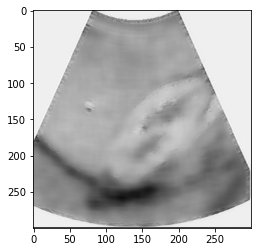

In [ ]:
from findpeaks import findpeaks
import findpeaks
img = cv2.imread('/content/drive/MyDrive/US.jpg')
img = findpeaks.stats.resize(img, size=(300,300))
img = findpeaks.stats.togray(img)
# Scale between [0-255]
img = findpeaks.stats.scale(img)
# Plot
image_lee = findpeaks.lee_filter(img, win_size=15, cu=0.25)

plt.imshow(image_lee, cmap='gray_r')